In [10]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import optimize
import sys
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
import seaborn as sns


filename=  os.path.abspath("heart.csv") #import csv file
data = pd.read_csv(filename,header= None, names =["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"])
dataframe= data.drop(data.index[0]) #delete first row with headers
dataframe.head() 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
dataframe = dataframe.to_numpy(dtype=np.float64) #turn dataframe into array

X = dataframe[:,:-1]  #first 13 columns for features
y = dataframe[:,-1] #last 1 column for target variable


m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1) # add a column of ones/ intercept

#split data into train and test set, random state for constant results. 
#after we train our classification algorithm, it needs to be able to generalize well new data.
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, train_size=0.70, random_state=2) 

#X_train.shape
X_test.shape


(91, 14)

In [12]:
'''LOGISTIC REGRESSION MODEL- sklearn package'''

#variable for my model named 'regr'
regr = linear_model.LogisticRegression(fit_intercept=False, max_iter=1000) #maximum number of iterations

#fit the model using train set
regr.fit(X_train,y_train) 

# make predictions using the testing set
y_pred_test = regr.predict(X_test)

# make predictions using the training set
y_pred_train= regr.predict(X_train)



Accuracy for test set/LR:  0.8901098901098901
Accuracy for train set/LR:  0.8443396226415094




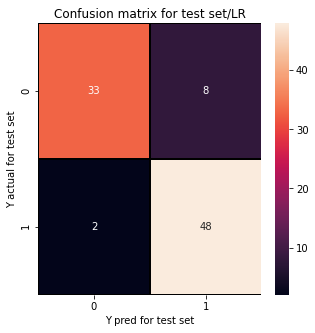

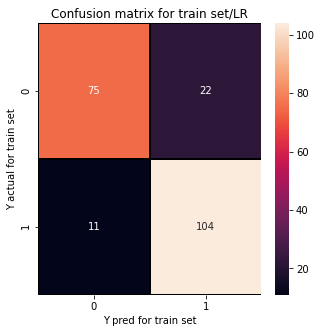

In [13]:
#evaluate model using train and test set
print("Accuracy for test set/LR: ",regr.score(X_test, y_test)) #acc= correct predictions / total number of data points
#print(accuracy_score(y_test, y_pred_test))
print("Accuracy for train set/LR: ",regr.score(X_train, y_train))
print()
#print("theta (parameters): ",regr.coef_) #print coefficients 
print()

#confusion matrix for test set
confusion_m_test = metrics.confusion_matrix(y_test, y_pred_test)
#print(confusion_m_test)
f, ax = plt.subplots(figsize=(5,5)) #visualize confusion matrix for test set
sns.heatmap(confusion_m_test,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Y pred for test set")
plt.ylabel("Y actual for test set")
plt.title("Confusion matrix for test set/LR")
plt.show()

#confusion matrix for train set
confusion_m_train = metrics.confusion_matrix(y_train, y_pred_train)
#print(confusion_m_train)
f, ax = plt.subplots(figsize=(5,5)) #visualize confusion matrix for train set. I  chose this way of plotting rather than a simple 'print' because it provides well the two matrices.
sns.heatmap(confusion_m_train,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Y pred for train set")
plt.ylabel("Y actual for train set")
plt.title("Confusion matrix for train set/LR")
plt.show()

In [26]:
'''SUPPORT VECTOR MACHINE with sklearn'''

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

  
#find the best parameters for my SVC model
params={'kernel':('linear','rbf'), #define hyperparameters for 'kernel' and 'C','gamma'=auto 
       'C':[1,10,20]}

model=SVC() 
GridSVC= GridSearchCV(model,params,cv=5) #cv for cross validation
GridSVC.fit(X_train,y_train) #train model in order to find the best params 

GridSVC.best_params_ #find the best parameters for my data


{'C': 10, 'kernel': 'linear'}

In [27]:
SVM_model= SVC(kernel='linear',C= 1E1,gamma='auto') #train my model again using only the best params
SVM_model.fit(X_train,y_train)
y_pred_test= SVM_model.predict(X_test) #make predictions for test set
y_pred_train= SVM_model.predict(X_train) #make predictions for train set


Accuracy for test set/SVM:  0.8461538461538461
Accuracy for train set/SVM:  0.839622641509434



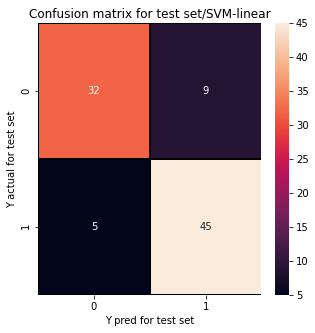

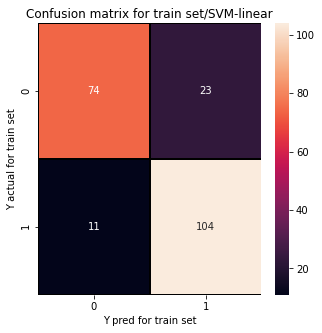

In [28]:
print("Accuracy for test set/SVM: ",SVM_model.score(X_test, y_test)) #acc= correct predictions / total number of data points
print("Accuracy for train set/SVM: ",SVM_model.score(X_train, y_train))
print()

#confusion Matrix 
confusion_m_test = metrics.confusion_matrix(y_test, y_pred_test)
confusion_m_train = metrics.confusion_matrix(y_train, y_pred_train)

f, ax = plt.subplots(figsize=(5,5)) #visualize confusion matrix for train set
sns.heatmap(confusion_m_test,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Y pred for test set")
plt.ylabel("Y actual for test set")
plt.title("Confusion matrix for test set/SVM-linear")
plt.show()

f, ax = plt.subplots(figsize=(5,5)) #visualize confusion matrix for train set
sns.heatmap(confusion_m_train,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Y pred for train set")
plt.ylabel("Y actual for train set")
plt.title("Confusion matrix for train set/SVM-linear")
plt.show()

In [17]:
#test radial and linear kernel with C=1, C=10, C=20, results on report
#accuracy for test and train set


SVM_model= SVC(kernel='linear',C= 20, gamma='auto') #train my model using C
SVM_model.fit(X_train,y_train)
y_pred_test= SVM_model.predict(X_test) #make predictions for test set
y_pred_train= SVM_model.predict(X_train) #make predictions for train set

print("Accuracy for test set/SVM linear: ",SVM_model.score(X_test, y_test)) #acc= correct predictions / total number of data points
print("Accuracy for train set/SVM linear: ",SVM_model.score(X_train, y_train))
print()


Accuracy for test set/SVM linear:  0.8461538461538461
Accuracy for train set/SVM linear:  0.839622641509434



In [18]:
'''Naive Bayes Classifier with sklearn''' #predictors are independent

from sklearn.naive_bayes import GaussianNB

nb_class = GaussianNB() #initialize my model with default hyperparameters
nb_class.fit(X_train, y_train) #train NB model

y_pred_test = nb_class.predict(X_test) #make predictions
y_pred_train = nb_class.predict(X_train)

Accuracy for test set/NB:  0.8571428571428571
Accuracy for train set/NB:  0.8018867924528302



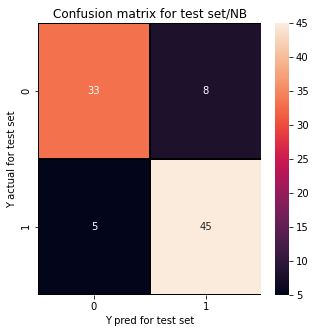

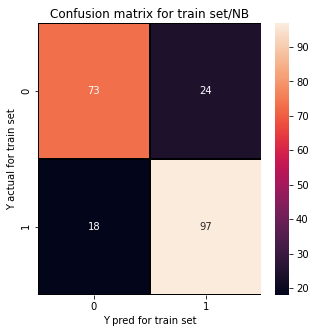

In [19]:
print("Accuracy for test set/NB: ",nb_class.score(X_test, y_test)) #acc= correct predictions / total number of data points
print("Accuracy for train set/NB: ",nb_class.score(X_train, y_train))
print()

#confusion Matrix 
confusion_m_test = metrics.confusion_matrix(y_test, y_pred_test)
confusion_m_train = metrics.confusion_matrix(y_train, y_pred_train)

f, ax = plt.subplots(figsize=(5,5)) #visualize confusion matrix for train set
sns.heatmap(confusion_m_test,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Y pred for test set")
plt.ylabel("Y actual for test set")
plt.title("Confusion matrix for test set/NB")
plt.show()

f, ax = plt.subplots(figsize=(5,5)) #visualize confusion matrix for train set
sns.heatmap(confusion_m_train,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Y pred for train set")
plt.ylabel("Y actual for train set")
plt.title("Confusion matrix for train set/NB")
plt.show()

In [20]:
"ΒΟΝUS" 

#1. polynomial features for logistic regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False) 
#The degree of the polynomial features,def. 2

X_train_poly = poly.fit_transform(X_train)
X_train_poly.shape #119 features (from 14)
X_test_poly= poly.fit_transform(X_test)
X_test_poly.shape 

lr = linear_model.LogisticRegression(fit_intercept=False,max_iter=1000)
lr.fit(X_train_poly,y_train) #fit logistic regression model using train set

y_pred_test_pol= lr.predict(X_test_poly)
y_pred_train_pol= lr.predict(X_train_poly)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for test set/LR polynomial:  0.8681318681318682
Accuracy for train set/LR polynomial:  0.8679245283018868


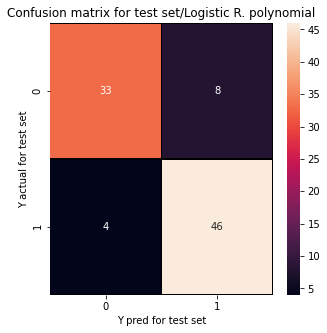

In [21]:
#evaluate model using train and test set

print("Accuracy for test set/LR polynomial: ",lr.score(X_test_poly, y_test)) #acc= correct predictions / total number of data points
print("Accuracy for train set/LR polynomial: ",lr.score(X_train_poly, y_train)) 


confusion_m_test = metrics.confusion_matrix(y_test, y_pred_test_pol)
f, ax = plt.subplots(figsize=(5,5)) #visualize confusion matrix for train set
sns.heatmap(confusion_m_test,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Y pred for test set")
plt.ylabel("Y actual for test set")
plt.title("Confusion matrix for test set/Logistic R. polynomial")
plt.show()


In [22]:
#2. Hyperparameters C for Logistic Regression

lr_bonus= linear_model.LogisticRegression(fit_intercept=False, max_iter=1000, C=1) #default C=1

lr_bonus.fit(X_train,y_train) #fit logistic regression model using train set

y_pred_test= lr_bonus.predict(X_test)
y_pred_train= lr_bonus.predict(X_train)
print("Accuracy for test set/LR, C=1: ",lr_bonus.score(X_test, y_test)) #acc= correct predictions / total number of data points
print("Accuracy for train set/LR, C=1: ",lr_bonus.score(X_train, y_train)) 
print()




Accuracy for test set/LR, C=1:  0.8901098901098901
Accuracy for train set/LR, C=1:  0.8443396226415094



In [23]:
lr_bonus1=linear_model.LogisticRegression(fit_intercept=False, max_iter=1000, C=5.0) #C=5
lr_bonus1.fit(X_train,y_train) 

y_pred_test= lr_bonus1.predict(X_test)
y_pred_train= lr_bonus1.predict(X_train)
print("Accuracy for test set/LR, C=5: ",lr_bonus1.score(X_test, y_test)) #acc= correct predictions / total number of data points
print("Accuracy for train set/LR, C=5: ",lr_bonus1.score(X_train, y_train)) 

print()



Accuracy for test set/LR, C=5:  0.8791208791208791
Accuracy for train set/LR, C=5:  0.839622641509434



In [24]:
lr_bonus2=linear_model.LogisticRegression(fit_intercept=False, max_iter=1000, C=10.0) #C=10
lr_bonus2.fit(X_train,y_train) 

y_pred_test= lr_bonus2.predict(X_test)
y_pred_train= lr_bonus2.predict(X_train)
print("Accuracy for test set/LR, C=10: ",lr_bonus2.score(X_test, y_test)) #acc= correct predictions / total number of data points
print("Accuracy for train set/LR, C=10: ",lr_bonus2.score(X_train, y_train)) 


Accuracy for test set/LR, C=10:  0.8791208791208791
Accuracy for train set/LR, C=10:  0.8443396226415094


In [25]:
#find the best parameter for C=[1,5,10] for my Logistic Regression model 

params={'C':[1,5,10]} #define hyperparameters for 'C'

model= linear_model.LogisticRegression(fit_intercept=False, max_iter=1000) 
GridLogistic= GridSearchCV(model,params,cv=5) #cv for cross validation
GridLogistic.fit(X_train,y_train) #train model in order to find the best params 

GridLogistic.best_params_ #find the best parameters for my data

{'C': 5}